<a href="https://colab.research.google.com/github/ArunadeviRamesh/Binary-Classification-Using-libSVM-tools-/blob/main/Binary_classification_using_libSVM_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take any binary class dataset and study the impact of different kernels on the performance of classification.  Also, record the performance against the different count of support-vectors.  Use the LibSVM tool to run this experiment.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/gender_classification_v7.csv")

In [ ]:
df.head(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female


In [ ]:
df = df.replace(to_replace={'Male':0,'Female':1})


In [ ]:
df.head(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1


In [ ]:
x=df.iloc[:,0:7]
y=df["gender"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x=df.iloc[:,0:7]
y=df["gender"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=1)
x_train = x_train.values.tolist()
y_train = y_train.values.tolist()
x_test = x_test.values.tolist()
y_test = y_test.values.tolist()


In [ ]:
! pip install libsvm

     |████████████████████████████████| 174kB 6.8MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233326 sha256=6f54911c753dfb48d70e54b6c09e287c59ff24c6fd1500d55b2a88b655b3e16b
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [ ]:
from libsvm import *
from libsvm.svmutil import *
prob = svm_problem(y_train,x_train)
param = svm_parameter()
param.kernel_type = RBF
param.degree = 3
param.C = 10
m=svm_train(prob, param)

In [ ]:
result = svm_predict(y_test,x_test ,m)
print(result[0])

Accuracy = 97.5512% (1952/2001) (classification)
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'],'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(x_train, y_train)
    print("Best parameters set found:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.2f (+/-%0.02f) for %r"
              % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained.")
    print("The scores are computed.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found:

{'C': 1000, 'kernel': 'rbf'}

Grid scores:

0.97 (+/-0.01) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.92 (+/-0.02) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.96 (+/-0.01) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.96 (+/-0.01) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96 (+/-0.01) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.97 (+/-0.01) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.96 (+/-0.01) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.01) for {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.96 (+/-0.01) for {'C': 1, 'kernel': 'linear'}
0.97 (+/-0.01) for {'C': 10, 'kernel': 'linear'}
0.96 (+/-0.01) for {'C': 100, 'kernel': 'linear'}
0.

In [ ]:
c=[]
for i in range(1,1001,10):
  c.append(i)
tuned_parameters = [{'kernel': ['rbf'],'C': c}]
tuned_parameters1 = [{'kernel': ['linear'],'C': c}]


In [ ]:
r=[]
clf = GridSearchCV(
        SVC(), tuned_parameters,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    r.append(mean)

Best parameters set found:

{'C': 461, 'kernel': 'rbf'}




In [ ]:
l=[]
clf = GridSearchCV(
        SVC(), tuned_parameters1,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    l.append(mean)

Best parameters set found:

{'C': 961, 'kernel': 'linear'}


In [ ]:
a=[]
clf = GridSearchCV(
        SVC(gamma=0.1), tuned_parameters,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    a.append(mean)

Best parameters set found:

{'C': 41, 'kernel': 'rbf'}


In [ ]:
b=[]
clf = GridSearchCV(
        SVC(gamma=0.01), tuned_parameters,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    b.append(mean)

Best parameters set found:

{'C': 991, 'kernel': 'rbf'}


In [ ]:
d=[]
clf = GridSearchCV(
        SVC(gamma=0.001), tuned_parameters,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    d.append(mean)

Best parameters set found:

{'C': 11, 'kernel': 'rbf'}


In [ ]:
x=[]
clf = GridSearchCV(
        SVC(gamma=0.1), tuned_parameters1,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    x.append(mean)

Best parameters set found:

{'C': 961, 'kernel': 'linear'}


In [ ]:
y=[]
clf = GridSearchCV(
        SVC(gamma=0.01), tuned_parameters1,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    y.append(mean)

Best parameters set found:

{'C': 961, 'kernel': 'linear'}


In [ ]:
z=[]
clf = GridSearchCV(
        SVC(gamma=0.001), tuned_parameters1,cv=5)
clf.fit(x_train, y_train)
print("Best parameters set found:")
print()
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    z.append(mean)

Best parameters set found:

{'C': 961, 'kernel': 'linear'}


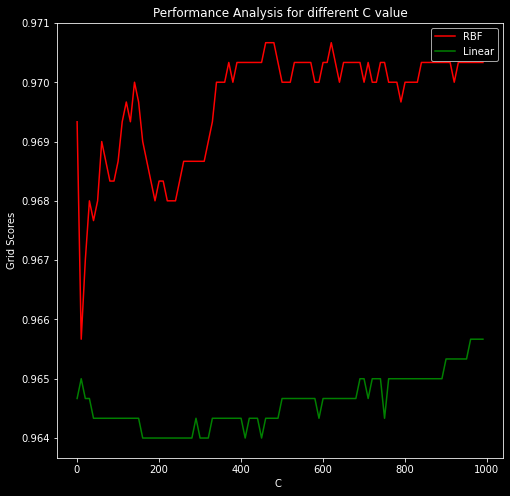

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(8,8)) 
plt.plot(c,r,color="red",label="RBF")
plt.plot(c,l,color="green",label="Linear")
plt.xlabel('C ')
plt.ylabel('Grid Scores')
plt.title('Performance Analysis for different C value')
plt.legend()
plt.show()

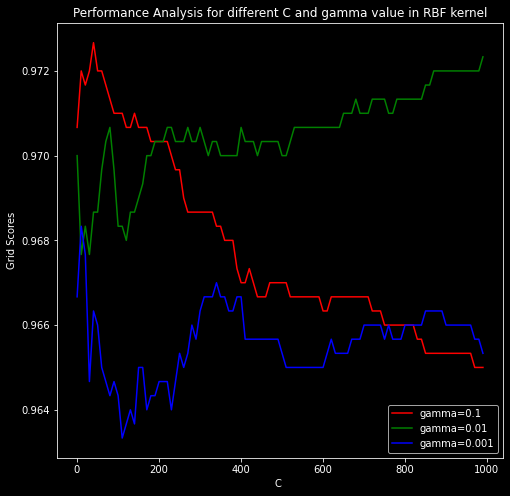

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(8,8)) 
plt.plot(c,a,color="red",label="gamma=0.1")
plt.plot(c,b,color="green",label="gamma=0.01")
plt.plot(c,d,color="blue",label="gamma=0.001")
plt.xlabel('C ')
plt.ylabel('Grid Scores')
plt.title('Performance Analysis for different C and gamma value in RBF kernel')
plt.legend()
plt.show()

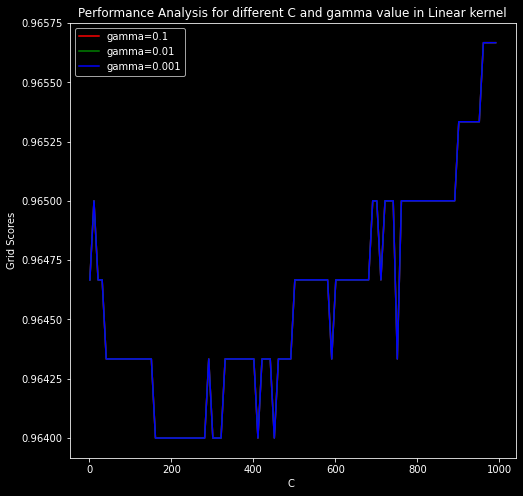

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(8,8)) 
plt.plot(c,x,color="red",label="gamma=0.1")
plt.plot(c,y,color="green",label="gamma=0.01")
plt.plot(c,z,color="blue",label="gamma=0.001")
plt.xlabel('C ')
plt.ylabel('Grid Scores')
plt.title('Performance Analysis for different C and gamma value in Linear kernel')
plt.legend()
plt.show()